In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
import datetime as dt
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
 
import warnings
warnings.filterwarnings("ignore")

In [2]:
start = dt.datetime(2015,1,1)
end = dt.datetime.now()
ticker = 'AAPL'

In [3]:
data =  yf.download(tickers=ticker, start=start, end=end)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565702,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873642,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875893,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210680,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140915,237458000
...,...,...,...,...,...,...
2023-04-14,164.589996,166.320007,163.820007,165.210007,165.210007,49337200
2023-04-17,165.089996,165.389999,164.029999,165.229996,165.229996,41516200
2023-04-18,166.100006,167.410004,165.649994,166.470001,166.470001,49923000


In [4]:
prices = data['Close'].values

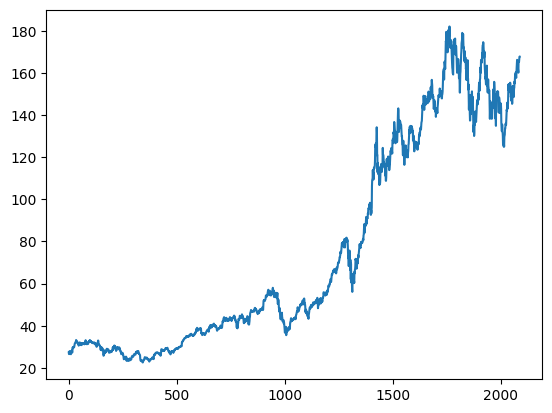

In [5]:
plt.plot(prices)

In [6]:
training_size = int(np.ceil(len(prices) * 0.9))

In [7]:
train_data = prices[0:training_size]


In [98]:
x_train = []
y_train = []

window_size = 30
 
for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i])
    y_train.append(train_data[i])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [99]:
tf.keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            input_shape=(x_train.shape[1], 1)))

model.add(keras.layers.Dense(64))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fc6efb9cca0>>

In [100]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=30
                    )

Epoch 1/30
58/58 [==============================] - 4s 16ms/step - loss: 5934.6479
Epoch 2/30
58/58 [==============================] - 1s 15ms/step - loss: 2285.9690
Epoch 3/30
58/58 [==============================] - 1s 16ms/step - loss: 238.1529
Epoch 4/30
58/58 [==============================] - 1s 16ms/step - loss: 6.4958
Epoch 5/30
58/58 [==============================] - 1s 16ms/step - loss: 4.8789
Epoch 6/30
58/58 [==============================] - 1s 26ms/step - loss: 5.5045
Epoch 7/30
58/58 [==============================] - 1s 19ms/step - loss: 4.3292
Epoch 8/30
58/58 [==============================] - 1s 18ms/step - loss: 3.5943
Epoch 9/30
58/58 [==============================] - 1s 15ms/step - loss: 3.4599
Epoch 10/30
58/58 [==============================] - 1s 15ms/step - loss: 3.6693
Epoch 11/30
58/58 [==============================] - 1s 15ms/step - loss: 3.7983
Epoch 12/30
58/58 [==============================] - 1s 16ms/step - loss: 3.2295
Epoch 13/30
58/58 [==========

In [101]:

test_data = prices[training_size - window_size:]
x_test = []
y_test = prices[training_size:]
for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i])
 
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
 
# predict the testing data
predictions = model.predict(x_test)
 
# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

#13.48
#14.4

7/7 [==============================] - 1s 8ms/step
MSE 231.46575759185302
RMSE 15.213998737736672


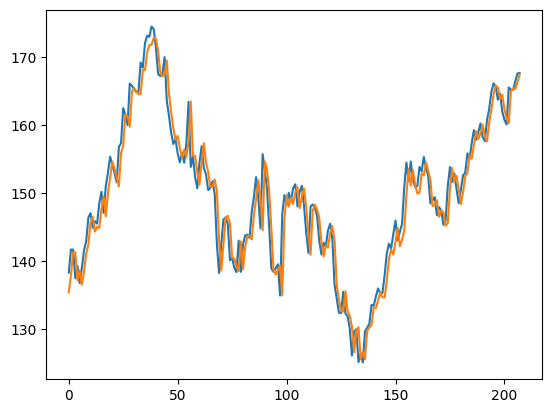

In [102]:
plt.plot(prices[training_size:])
plt.plot(predictions)
